In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba    



In [2]:
os.getcwd()  # Muestra la ruta actual


'c:\\Users\\esteb\\Desktop\\physics\\mestrado_thz_physics'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from functions_master import *
import warnings

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def FourierT2(f,N):
    return np.conj(sp.fft.fft(f.values,n=N))


In [4]:
# Configuración desde el archivo txt (simulada aquí como un diccionario)
config = {
    'figure.constrained_layout.use': True,
    'figure.figsize': (5.4, 3.2),
    'figure.titlesize': 'small',
    'figure.labelsize': 'small',
    'font.size': 10,
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.texsystem': 'lualatex',
    'pgf.rcfonts': False,
    'pgf.preamble': r'\usepackage{siunitx,fontspec}\setmainfont{Times New Roman}',
    'lines.linewidth': 1,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 4,
    'legend.frameon': False,
    'legend.markerscale': 0.8,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.2,
    'xtick.top': True,
    'xtick.major.size': 5,
    'xtick.major.width': 0.8,
    'xtick.minor.width': 0.8,
    'xtick.minor.size': 3,
    'xtick.labelsize': 'small',
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.major.size': 5,
    'ytick.major.width': 0.8,
    'ytick.minor.width': 0.8,
    'ytick.minor.size': 3,
    'ytick.labelsize': 'small',
    'ytick.direction': 'in',
    'axes.linewidth': 0.8,
    'axes.axisbelow': False,
    'axes.labelsize': 'medium',
    'axes.labelpad': 2,
    'figure.constrained_layout.h_pad': 0.02,
    'figure.constrained_layout.w_pad': 0.01,
    'figure.constrained_layout.hspace': 0.02,
    'figure.constrained_layout.wspace': 0.02,
    'svg.fonttype': 'none'
}

# Aplicar la configuración
plt.rcParams.update(config)

In [132]:
ruta_actual = os.getcwd()

carpeta = os.path.join(ruta_actual, 'PbTe', '20-20')

#rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20'
carpeta_ref = os.path.join(ruta_actual,"PbTe","substrate","20-20")
#carpeta_ref = rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\substrate\20-20'

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))


archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

N = 4 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_10.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_20.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_40.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_60.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_80.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Avera

In [133]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

# bis = [0.02,0.03,0.06,0.07,0.1,0.15] # Porcentaje de Bismuto.

delta_ls = {"20-20": 0.446-0.360, # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20-20"
d = 0.0016

In [134]:
delta_ls

{'20-20': 0.08600000000000002}

9


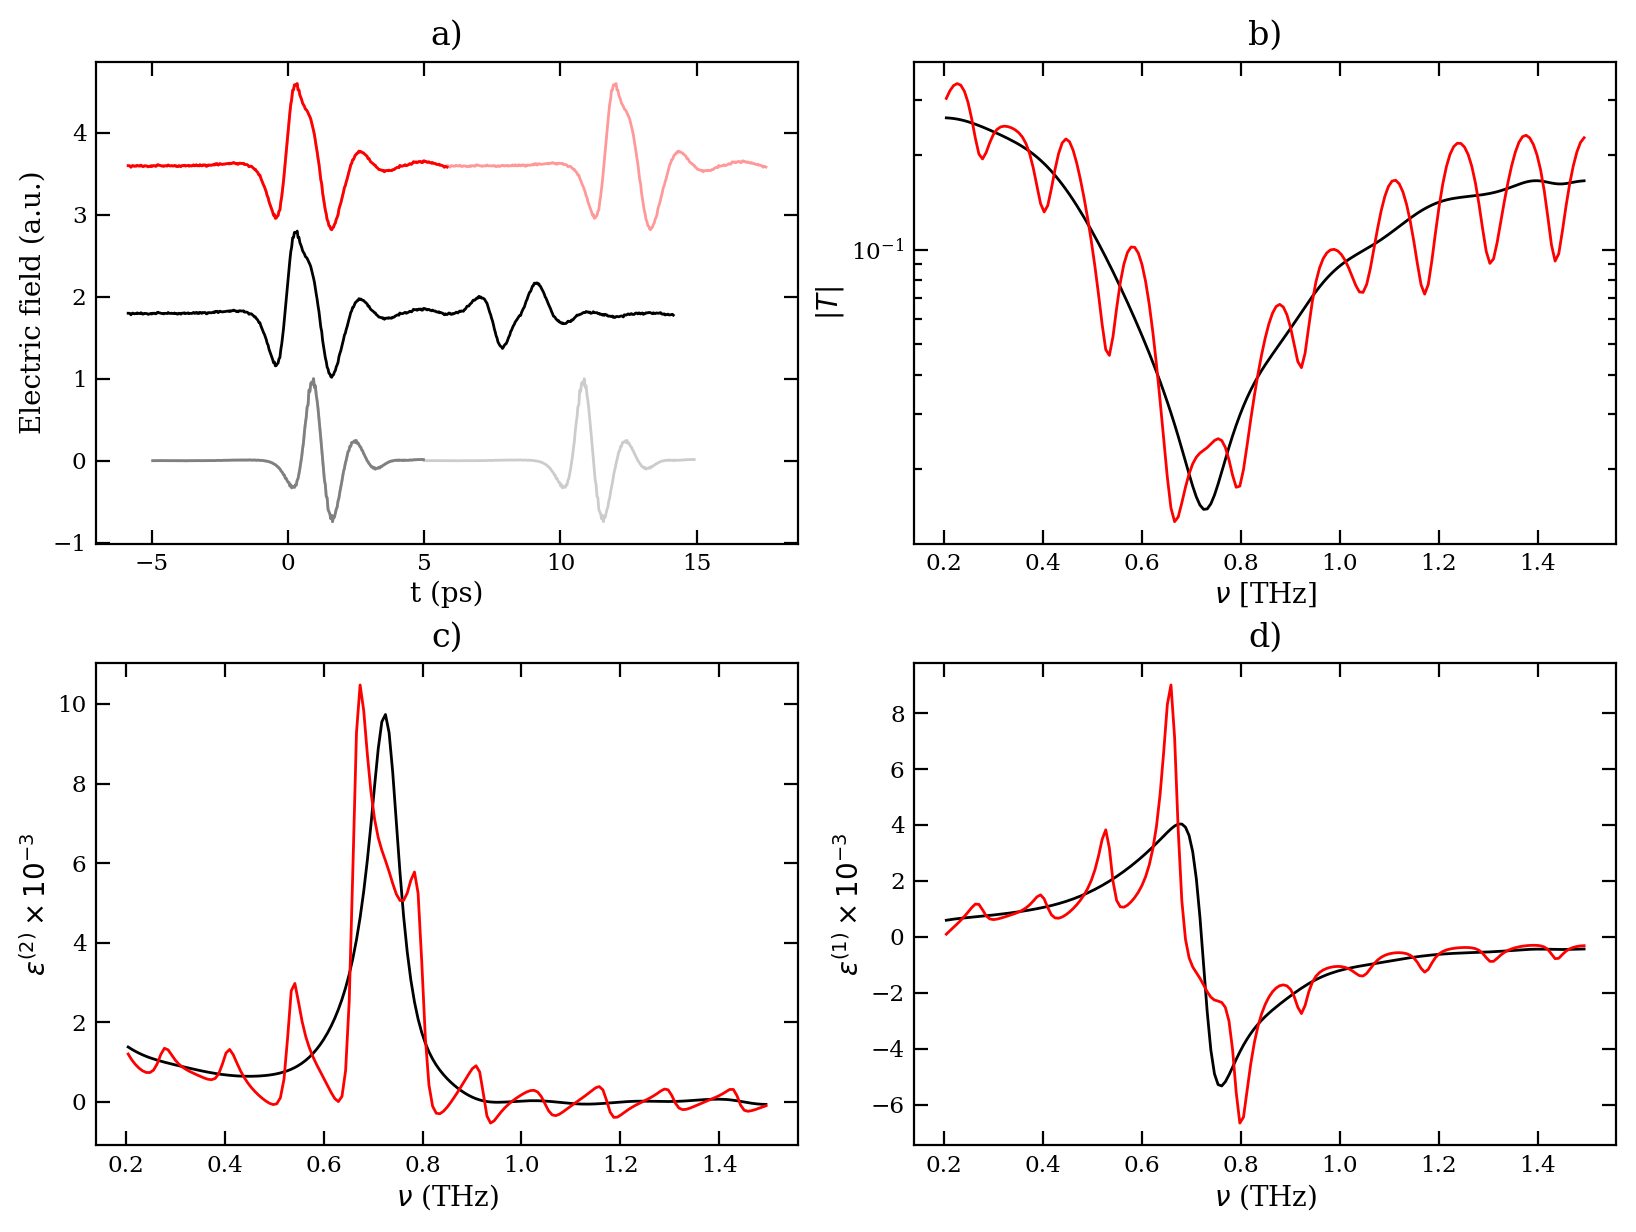

In [11]:


left,right_sample,right_subs,index,correc_subs,desv = 380,392,390,6,-0.028,100

f = plt.figure(figsize=(8,6),dpi=200)

N = 2**12

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]
# params_window = ['flattop']
# params_window = ['barthann']

phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

# Datos sin ventana.
x,y = getFilterdata(path_signal,right_sample,left)
x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

x = x-x.iloc[len(x)//2]
x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]

plt.subplot(221)

x_min, x_max = np.min(x_ref), np.max(x_ref)
period = x_max - x_min  # Longitud del período
n_repeats = 1
x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x_ref] + x_right)
y_periodic = np.tile(y_ref,n_repeats + 1)  
val = 1.8*2
plt.plot(x_ref,y_ref/max(y_ref),color='gray',label='Reference using rectangle window')
plt.plot(x_periodic, y_periodic/max(y_periodic), color='gray', alpha=0.4)


x_min, x_max = np.min(x), np.max(x)
period = x_max - x_min  # Longitud del período

n_repeats = 1
x_right = [x + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x] + x_right)
y_periodic = np.tile(y,  n_repeats + 1)  



plt.plot(x,y/max(y)+val,'r',label='Sample signal using rectangle window')
# plt.xlabel('t (ps)')
plt.plot(x_periodic, y_periodic/max(y_periodic)+val, color='red', alpha=0.4)

right_sample_proof = right_sample + 10
x_p,y_p= getFilterdata(path_signal,right_sample_proof,left)
x_p = x_p-x_p.iloc[len(x)//2]
plt.plot(x_p,y_p/max(y_p)+val/2, color='k',label='Sample signal without window')
plt.xlabel('t (ps)')
plt.title('a)')
plt.ylabel('Electric field (a.u.)')
#plt.legend(loc='upper right')


k = 15
nu = sp.fft.fftfreq(N, 1/30)
    # Aplicar ventana de Hamming a la señal

x_p_subs,y_p_subs= getFilterdata(path_ref,right_subs+10,left)
y_subs_ventana = pd.Series(y_p_subs)
y_signal_ventaneada = pd.Series(y_p)

# Transformada de Fourier de las señales
fft_y_signal_ventaneada = FourierT2(y,N)[1:len(nu)//k]
fft_y_subs_ventaneada = FourierT2(y_ref,N)[1:len(nu)//k]

fft_y_signal= FourierT2(y_p,N)[1:len(nu)//k]
fft_y_subs = FourierT2(y_p_subs,N)[1:len(nu)//k]

fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.5
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

fft_y_signal= fft_y_signal[mask]
fft_y_subs = fft_y_subs[mask]
fft_window = fft_window[mask]

global delta_ls_corr

delta_ls_corr = delta_ls[sample] + correc_subs
T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)#*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

# plt.subplot(425)

# plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada),'k',label='FFT substrate using windows')
# plt.plot(nu_filtradas, np.abs(fft_y_subs), 'r',label='FFT substrate using rectangle window')
# plt.yscale('log')
# plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
# #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
# plt.legend()


plt.subplot(222)

plt.plot(nu_filtradas, np.abs(T_ventana),'k', label='Without window')
plt.plot(nu_filtradas, np.abs(T), 'r',label='Rectangle window')
plt.ylabel(r'$|T|$')
plt.xlabel(r'$\nu$ [THz]')
plt.title('b)')
#plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')


plt.yscale('log')
#plt.xlabel(r'$\nu$ [THz]',fontsize=15)
#plt.legend()

plt.subplot(223)
plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'k', label='Without window')
plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r',label='Rectangle window')
plt.xlabel(r'$\nu$ (THz)')
plt.title('c)')
#plt.yscale('log')
plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
#plt.xlabel(r'$\omega$ [THz]')
#plt.legend()


plt.subplot(224)
plt.plot(nu_filtradas, np.real(ep_con)*1e-3, 'k', label='Without window''Rectangle windows')
plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r',label='Rectangle windows')
plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
plt.xlabel(r'$\nu$ (THz)')
plt.title('d)')
#plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
#plt.legend()#


plt.savefig("fig1.png", dpi=300, bbox_inches='tight', format='png')
  

plt.show()



# PbTe 10 K

3


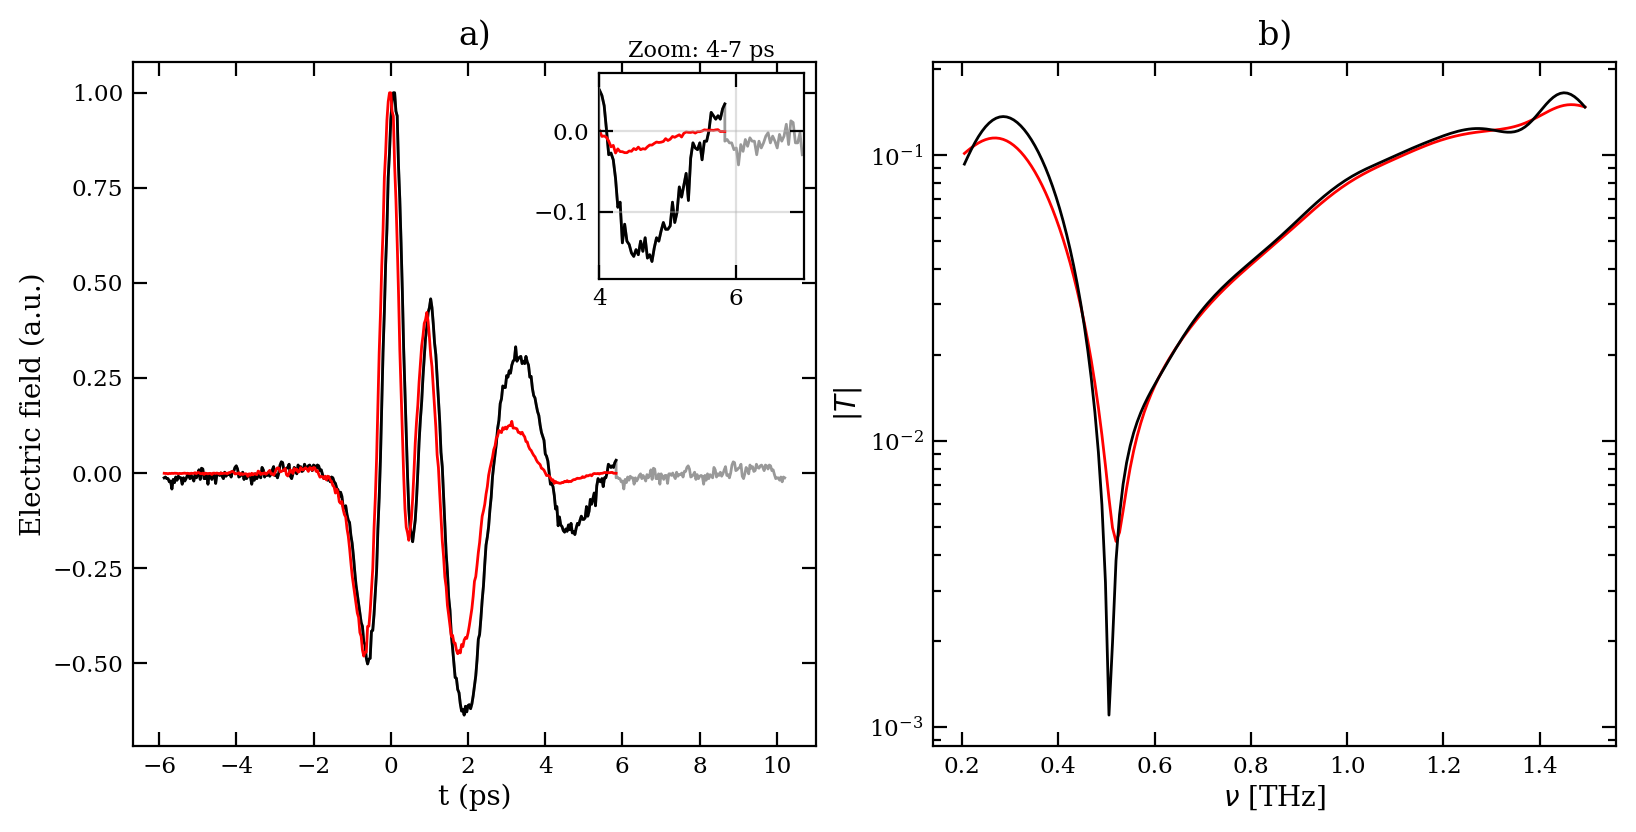

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

left,right_sample,right_subs,index,correc_subs,desv = 380,392,390,0,-0.028,100

f = plt.figure(figsize=(8, 4),dpi=200)

N = 2**12

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
params_window = ['gaussian', desv]
# params_window = ['flattop']
# params_window = ['barthann']

phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

# Datos sin ventana.
x,y = getFilterdata(path_signal,right_sample,left)
x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

y_subs_ventana = pd.Series(y_substrate_padding*ventana)
y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)


x = x-x.iloc[len(x)//2]
x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]
plt.subplot(121)

x_min, x_max = np.min(x_ref), np.max(x_ref)
period = x_max - x_min  # Longitud del período
n_repeats = 1
x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x_ref] + x_right)
y_periodic = np.tile(y_ref,n_repeats + 1)  
val = 1.8*2
# plt.plot(x_ref,y_ref/max(y_ref)+val,'--r',label='Reference using rectangle window')
# plt.plot(x_periodic, y_periodic/max(y_periodic)+val, color='red', alpha=0.4)


x_min, x_max = np.min(x), np.max(x)
period = x_max - x_min  # Longitud del período

n_repeats = 1
x_right = [x + period * i for i in range(1, n_repeats + 1)]
x_periodic = np.concatenate([x] + x_right)
y_periodic = np.tile(y,  n_repeats + 1)  
x_ext = np.linspace(x_min,x_max,len(ventana))


plt.plot(x,y/max(y),'k',label='Sample signal using rectangle window')
# plt.xlabel('t (ps)')
nn = -220
plt.plot(x_periodic[:nn], (y_periodic/max(y_periodic))[:nn], color='black', alpha=0.4)
# plt.plot(x_ext,ventana,'ro',label=f'{params_window[0]} window')
plt.plot(x_ext,y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana),'r',label=f'Sample signal+Window+rectangle window')
plt.title('a)')
plt.xlabel('t (ps)')
plt.ylabel('Electric field (a.u.)')
# plt.legend(loc='lower right')
# plt.xlim(max(x)-5,max(x)+)


# Configurar los límites de la lupa
zoom_xlim = (4,7)

# Crear máscaras para cada señal en el rango de zoom
mask_x = (x >= zoom_xlim[0]) & (x <= zoom_xlim[1])
mask_x_periodic = (x_periodic >= zoom_xlim[0]) & (x_periodic <= zoom_xlim[1])
mask_x_ext = (x_ext >= zoom_xlim[0]) & (x_ext <= zoom_xlim[1])

# Obtener los valores de Y para cada señal en el rango de zoom
y1_zoom = y[mask_x]/max(y)
y2_zoom = (y_periodic/max(y_periodic))[mask_x_periodic]
y3_zoom = (y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana))[mask_x_ext]

# Calcular los límites Y considerando todas las señales
y_min = min(np.min(y1_zoom), np.min(y2_zoom), np.min(y3_zoom))
y_max = max(np.max(y1_zoom), np.max(y2_zoom), np.max(y3_zoom))
margin = 0.1 * (y_max - y_min)  # 10% de margen

# Crear la lupa
ax = plt.gca()
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')

# Graficar solo los datos en el rango de zoom (mejor rendimiento)
ax_inset.plot(x[mask_x], y1_zoom, 'k', label='Señal rectangular')
ax_inset.plot(x_periodic[mask_x_periodic], y2_zoom, color='black', alpha=0.4, label='Señal periódica')
ax_inset.plot(x_ext[mask_x_ext], y3_zoom, 'r', label='Señal ventaneada')

# Configurar los límites con margen
ax_inset.set_xlim(zoom_xlim)
ax_inset.set_ylim(y_min - margin, y_max + margin)

# Añadir elementos de estilo
ax_inset.grid(True, alpha=0.4)
ax_inset.set_title(f'Zoom: {zoom_xlim[0]}-{zoom_xlim[1]} ps', fontsize=8)
# ax_inset.legend(fontsize=6)

# # Resaltar región en gráfico principal
# ax.axvspan(zoom_xlim[0], zoom_xlim[1], color='blue', alpha=0.15)
# mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5", linestyle='--')


k = 15
nu = sp.fft.fftfreq(N, 1/30)
    # Aplicar ventana de Hamming a la señal



# Transformada de Fourier de las señales
fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.5
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

fft_y_signal= fft_y_signal[mask]
fft_y_subs = fft_y_subs[mask]
fft_window = fft_window[mask]

global delta_ls_corr

delta_ls_corr = delta_ls[sample] + correc_subs
T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n


plt.subplot(122)

plt.plot(nu_filtradas, np.abs(T_ventana),'r', label=f'{params_window[0]} window')
plt.plot(nu_filtradas, np.abs(T), 'k',label='Rectangle window')
plt.ylabel(r'$|T|$')
plt.title('b)')
plt.yscale('log')
plt.xlabel(r'$\nu$ [THz]')
#plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')


# plt.yscale('log')
# #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
# # plt.legend()

# plt.subplot(223)
# plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'r', label=f'{params_window[0]} window')
# plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'k',label='Rectangle window')
# plt.xlabel(r'$\nu$ (THz)')
# #plt.yscale('log')
# plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
# #plt.xlabel(r'$\omega$ [THz]')
# # plt.legend()


# plt.subplot(224)
# plt.plot(nu_filtradas, np.real(ep_con)*1e-3, 'r', label=f'{params_window[0]} window')
# plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'k',label='Rectangle windows')
# plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
# plt.xlabel(r'$\nu$ (THz)')
# #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
# # plt.legend()


plt.savefig("fig2.png", dpi=300, bbox_inches='tight', format='png')
  

plt.show()



15
16
14
15
13
15
13
13
10
11
9
7
6
3
5
3


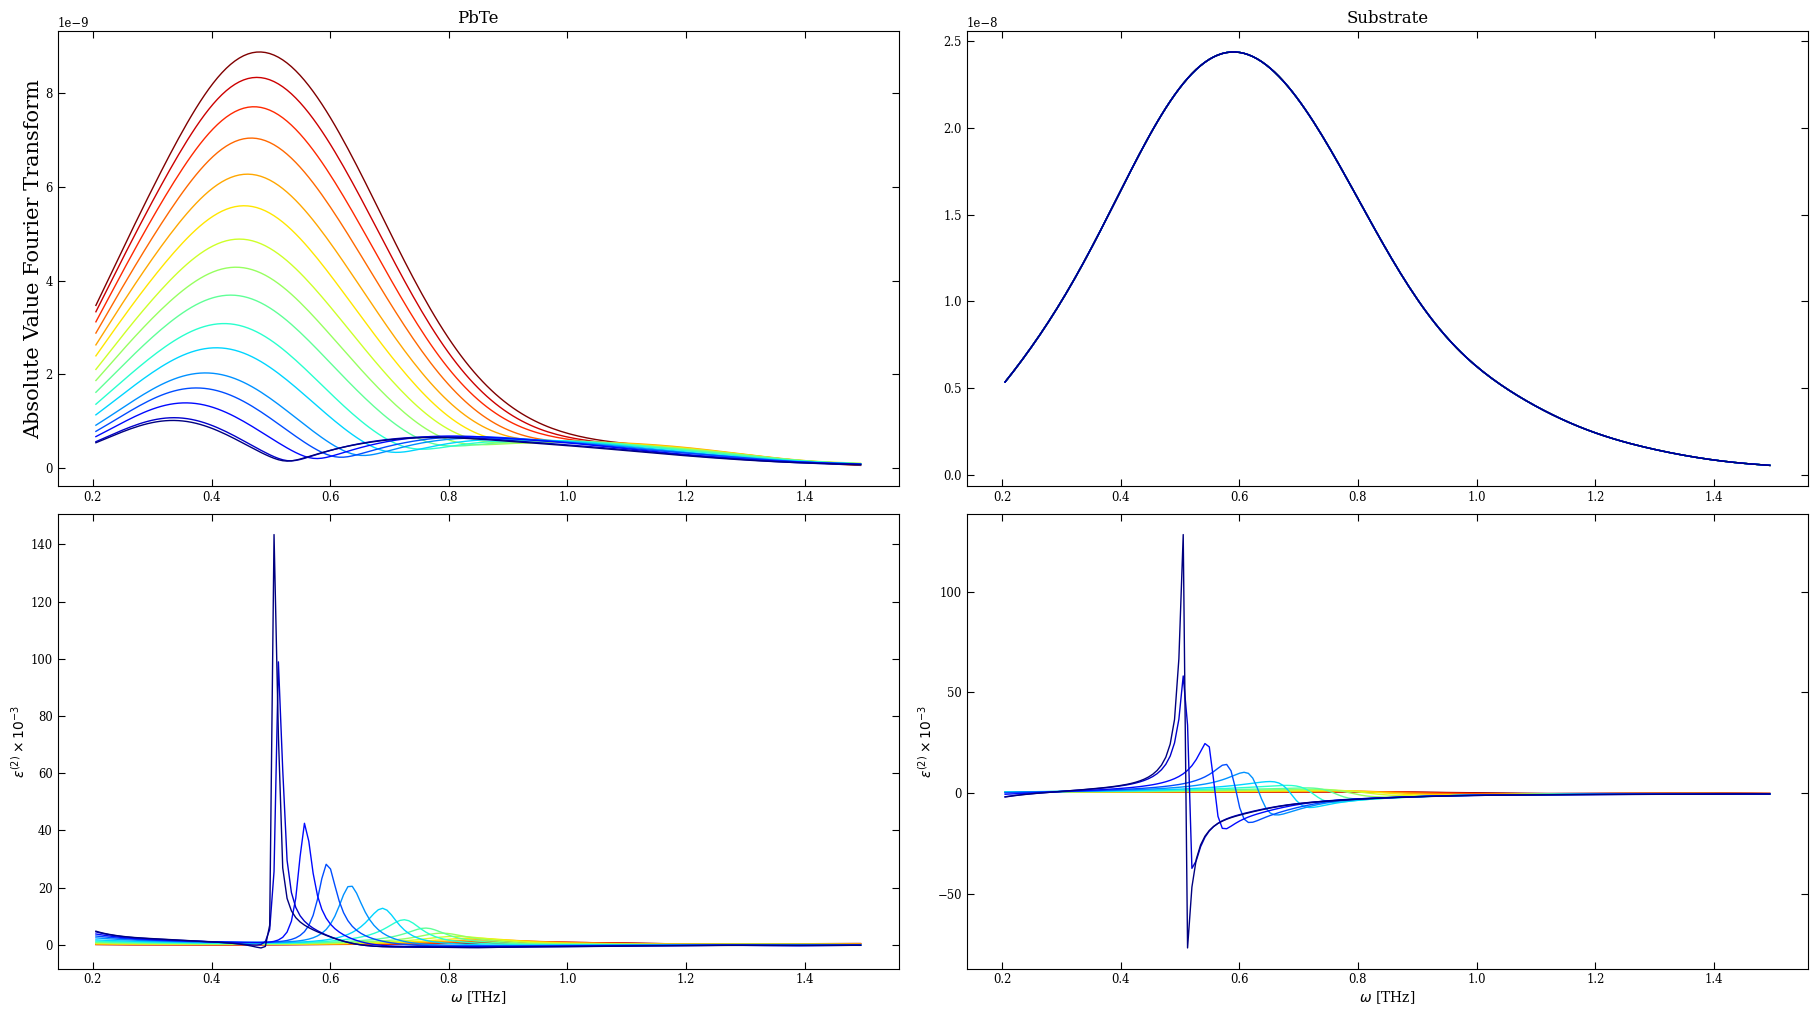

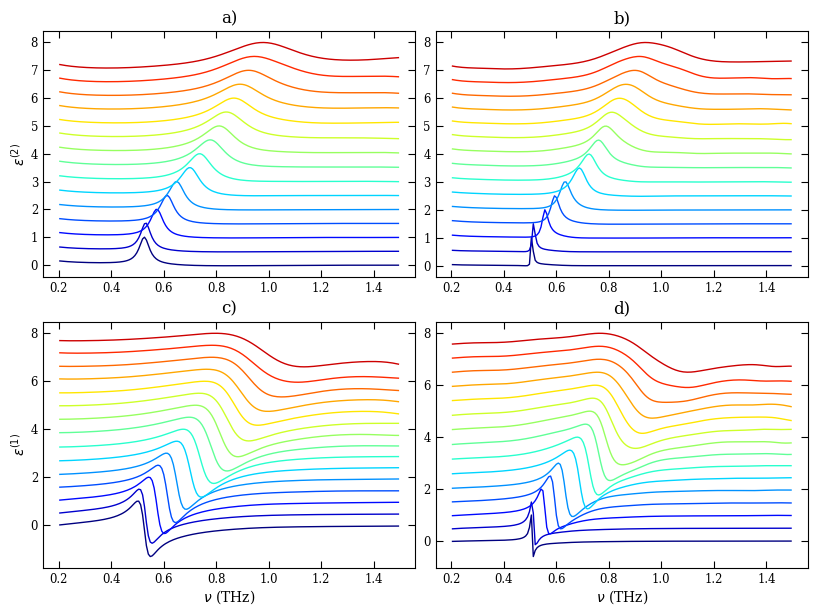

In [15]:
# Leer los archivos .dat
# f = plt.figure(figsize=(15,13))
permitividade_window = []
permitividade = []
temps = []
N = 2**12
nk0 = left
nk1 = right_sample
nk2 = right_subs
fig = plt.figure(figsize=(18, 10))
for i,j in enumerate(archivos_ordenados_s[::-1]):


    path_signal = os.path.join(path_analisis,j)
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])
    temps.append(extraer_temperatura(path_signal))
    # params_window = ['gaussian', 46.78]
    params_window = ['barthann']
    x,y = getFilterdata(path_signal,nk1,nk0)
    x_ref,y_ref = getFilterdata(path_ref,nk2,nk0)
   
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,nk0,nk1,nk2,params_window)
    # Datos substrate
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]
    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]


    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.5
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    fft_y_signal = fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]

    
    # phase = idx_max_signal-idx_max_substrate

    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    n = 2.6

    
    permitividade_window.append(ep_con)
    permitividade.append(ep_sin)


    plt.subplot(221)
    plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada), label='FFT SIGNAL',color = colors[i])
    plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    plt.title('PbTe')
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    #plt.legend()

    plt.subplot(222)
    plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada), label='FFT SUBSTRATE',color = colors[i])
    plt.title('Substrate')
    #plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    # plt.legend()



    plt.subplot(223)
    plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3,color = colors[i])
    
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    # plt.legend()
# 

    plt.subplot(224)
    plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, label='with window '+str(extraer_temperatura(archivos_ordenados_s[i]))+' K',color = colors[i])
    #plt.yscale('log')
    
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    # plt.xlabel(r'$\omega$ [THz]')
    plt.xlabel('$\omega$ [THz]')
    #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    #plt.legend()


fig, (ax1, ax2) = plt.subplots(2,2,figsize=(8, 6))
offset = 0.5  # Desplazamiento vertical entre las curvas
cont = 0
for i in range(1,len(permitividade_window),1):
    ep_window = permitividade_window[-i]
    ep = permitividade[-i]
    ax1[0].plot(nu_filtradas, np.imag(ep_window)/max(np.imag(ep_window)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax1[0].set_ylabel(r'$\epsilon^{(2)}$')
    ax1[0].set_title('a)')

    ax1[1].plot(nu_filtradas, np.imag(ep)/max(np.imag(ep)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax1[1].set_title('b)')
    # ax1[1].set_xlabel(r'$\omega$ [THz]')
    #ax2.set_ylabel(r'$\epsilon^{(2)}$')
    #ax1.set_title('Sample: '+sample)
    ax2[0].plot(nu_filtradas, np.real(ep_window)/max(np.real(ep_window)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax2[0].set_ylabel(r'$\epsilon^{(1)}$')
    ax2[0].set_xlabel(r'$\nu$ (THz)')
    ax2[0].set_title('c)')
    #ax2.set_title('Sample: '+sample)
    ax2[1].plot(nu_filtradas, np.real(ep)/max(np.real(ep)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax2[1].set_xlabel(r'$\nu$ (THz)')
    # ax2[1].set_ylabel(r'$\epsilon^{(1)}$')
    ax2[1].set_title('d)')
   # plt.legend(loc='upper right')
    cont+=1


plt.savefig("fig3.png", dpi=300, bbox_inches='tight', format='png')
  

# PbSnTe

In [118]:
ruta_actual = os.getcwd()


carpeta = os.path.join(ruta_actual, 'PbSnTe','PbSnTe+0.06Bi','PbSnTe+0.06Bi')


carpeta_ref = os.path.join(ruta_actual,'PbSnTe',"Substrate_PbSnTe+0.06Bi","Substrate_PbSnTe+0.06Bi")

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))


archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

N = 4 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1\Average_9.1K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1\Average_15.0K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1\Average_24.3K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1\Average_35.5K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbSnTe\PbSnTe+0.06Bi\PbSnTe+0.06Bi\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbSnTe\PbSnTe+0.0

In [119]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

delta_ls = {"19007": 0.515-0.360,
            "20000": 0.640-0.360 # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20000"
d = 0.002

# Correccion referencia

Ajuste: y = 0.0020 * x + 0.4399
Para Temp = 350, data_cal = 1.1291


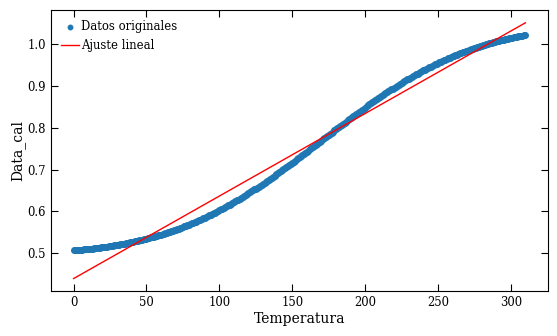

In [21]:
# Tus datos

correc_temp = os.path.join(ruta_actual, 'PbSnTe/subs_2_calibration.csv',)
data = pd.read_csv(correc_temp, sep=',')

Temp_cal = data['Unnamed: 0'].values
data_cal = data['0'].values

# Ajuste lineal
coef = np.polyfit(Temp_cal, data_cal, 1)  # grado 1 -> lineal
m, b = coef
print(f'Ajuste: y = {m:.4f} * x + {b:.4f}')

# Función para predecir nuevos valores
def predict(temp):
    return m * temp + b

# Ejemplo: predecir data_cal para una nueva temperatura
temp_nueva = 350  # o el valor que quieras
data_cal_predicha = predict(temp_nueva)
print(f'Para Temp = {temp_nueva}, data_cal = {data_cal_predicha:.4f}')

# (opcional) Graficar el ajuste
plt.scatter(Temp_cal, data_cal, label='Datos originales')
plt.plot(Temp_cal, predict(Temp_cal), color='red', label='Ajuste lineal')
plt.xlabel('Temperatura')
plt.ylabel('Data_cal')
plt.legend()
plt.show()

In [ ]:
def anim2(left,right_sample,right_subs,index,correc_subs,desv):
    
    f = plt.figure(figsize=(18, 25),dpi=200)

    N = 2**12

    global nk0, nk1, nk2
    nk0 = left
    nk1 = right_sample
    nk2 = right_subs

    path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])
    params_window = ['gaussian', desv]
   # params_window = ['flattop']
    # params_window = ['barthann']
    temp_nueva = extraer_temperatura(archivos_ordenados_s[int(index)])
    correc_temp =  predict(temp_nueva)

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

    # Datos sin ventana.
    x,y = getFilterdata(path_signal,right_sample,left)
    x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

    y_ref = y_ref*correc_temp 
    y_substrate_padding = y_substrate_padding*correc_temp 

    # Datos con ventana.
    
    plt.subplot(421)
     # Determinar el período de la señal
    x_min, x_max = np.min(x_ref), np.max(x_ref)
    period = x_max - x_min  # Longitud del período

    # Número de repeticiones a izquierda y derecha
    n_repeats = 1

    # Crear copias desplazadas de la señal de forma generalizada
    x_left = [x_ref - period * i for i in range(n_repeats, 0, -1)]
    x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate(x_left + [x_ref] + x_right)
    y_periodic = np.tile(y_ref, 2 * n_repeats + 1)  
    #plt.plot(x,y/max(y),'k',label='Signal rectangle window')
    plt.plot(x_ref,y_ref/max(y_ref),'--r',label='Reference using rectangle window')
    plt.plot(x_periodic, y_periodic/max(y_periodic), label="Periodic signal", color='red', alpha=0.4)
    # plt.plot(x,ventana,'r',label='Barthann window')
    # plt.plot(x,y_signal_ventaneada/max(y_signal_ventaneada),'o',color = colors[-int(index)],label='Signal + window')
    plt.xlabel('t [ps]')
    plt.title(f'T = '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    plt.legend(loc='upper right')

    plt.subplot(422)

     # Determinar el período de la señal
    x_min, x_max = np.min(x), np.max(x)
    period = x_max - x_min  # Longitud del período
    # Número de repeticiones a izquierda y derecha
    n_repeats = 1

    # Crear copias desplazadas de la señal de forma generalizada
    x_left = [x - period * i for i in range(n_repeats, 0, -1)]
    x_right = [x + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate(x_left + [x] + x_right)
    y_periodic = np.tile(y, 2 * n_repeats + 1)  

    plt.plot(x,y/max(y),'k',label='Film signal using rectangle window')
    plt.xlabel('t (ps)')
    plt.plot(x_periodic, y_periodic/max(y_periodic), label="Periodic signal", color='black', alpha=0.4)

    plt.legend(loc='upper right')
    


    plt.subplot(423)
     # Determinar el período de la señal
    plt.plot(y_substrate_padding*ventana/max(y_substrate_padding*ventana),'k',label=f'Reference+rectangle+{params_window[0]} window')
    plt.plot(y_substrate_padding/max(y_substrate_padding),'r',label=f'Reference+rectangle window')
    plt.plot(ventana,color='silver',label=f'{params_window[0]} window')
    # plt.plot(y_subs_ventana/max(y_subs_ventana),'--r',label='Substrate + window')
    plt.xlabel('t [ps]')
    #plt.title(f'T = '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    plt.legend()

    plt.subplot(424)

    plt.plot(y_signal_ventaneada/max(y_signal_ventaneada),'k',label=f'Film signal+rectangle+{params_window[0]} window')
    plt.plot(y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana),'r',label=f'Reference+rectangle window')
    plt.plot(ventana,color='silver',label=f'{params_window[0]} window')
    plt.legend()


    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.15, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]
    fft_window = fft_window[mask]

    global delta_ls_corr

    delta_ls_corr = delta_ls[sample] + correc_subs
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    plt.subplot(425)

    plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada),'k',label='FFT substrate using windows')
    plt.plot(nu_filtradas, np.abs(fft_y_subs), 'r',label='FFT substrate using rectangle window')
    plt.yscale('log')
    plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()


    plt.subplot(426)

    plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)/max(np.abs(fft_y_signal_ventaneada)),'k', label='FFT film signal using windows')
    plt.plot(nu_filtradas, np.abs(fft_y_signal)/max(np.abs(fft_y_signal)), 'r',label='FFT film signal using rectangle window')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')
    
    
    plt.yscale('log')
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()

    plt.subplot(427)
    plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'k', label='Using window ')
    plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r',label='Rectangle window')
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    #plt.xlabel(r'$\omega$ [THz]')
    plt.legend()


    plt.subplot(428)
    plt.plot(nu_filtradas, np.real(ep_con)*1e-3, 'k', label='Using windows')
    plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r',label='Rectangle window')
    plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    plt.legend()

    # plt.savefig("my_figure.png", dpi=300, bbox_inches='tight', format='png')
    plt.show()
  

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        left= widgets.FloatSlider(min=350,max=420,value=350,step=0.1,**opc),
        right_sample= widgets.FloatSlider(min=350,max=420,value=410,step=0.1,**opc),
        right_subs= widgets.FloatSlider(min=350,max=420,value=406.4,step=0.1,**opc),
        index= widgets.FloatSlider(min=0,max=len(archivos_ordenados_s)-1,value=7,step=1,**opc),
        correc_subs=widgets.FloatSlider(min=-delta_ls[sample],max=delta_ls[sample],value=0,step=0.001,**opc),
        desv = widgets.FloatSlider(min=0,max=200,value=62.097,step=0.001,**opc)

        )

interactive(children=(FloatSlider(value=350.0, continuous_update=False, description='left', max=420.0, min=350…

<function __main__.anim2(left, right_sample, right_subs, index, correc_subs, desv)>

In [131]:
delta_ls[sample]

0.28

64.6
39
39
39


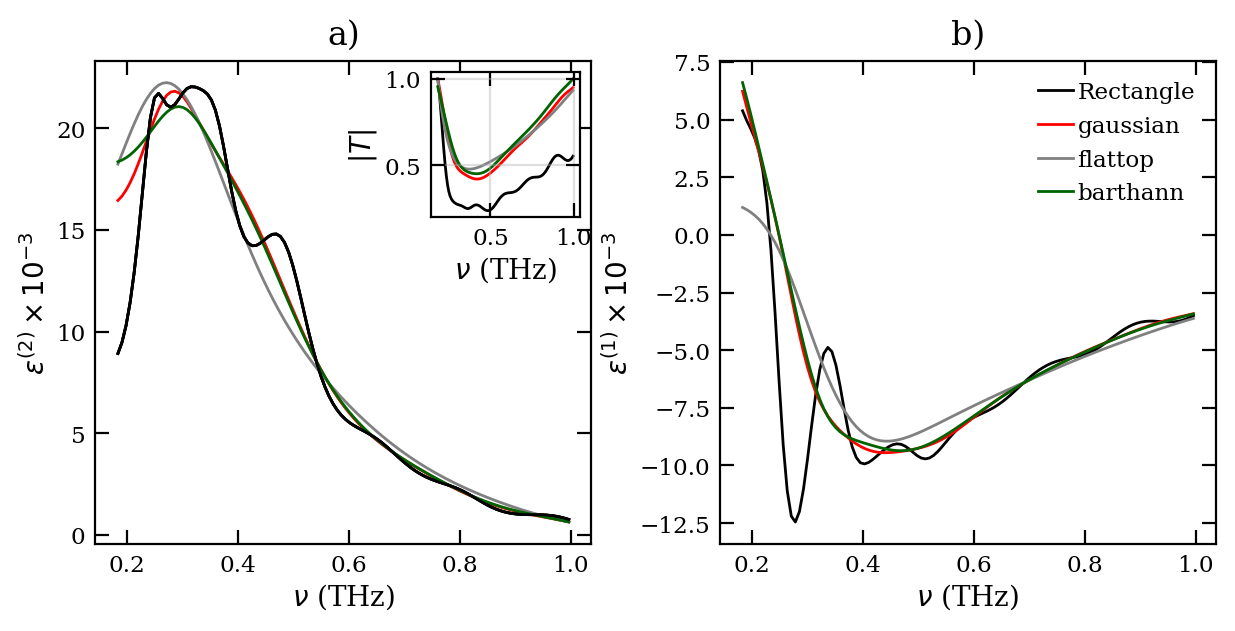

In [130]:
left,right_sample,right_subs,index,correc_subs,desv = nk0, nk1, nk2,6,0,91.122
params_window1 = ['gaussian', desv]
params_window2 = ['flattop']
params_window3 = ['barthann']
ventanas = [params_window1,params_window2,params_window3]
colors = ['red','gray','darkgreen']
names = [params_window1[0],params_window2[0],params_window3[0]]

f = plt.figure(figsize=(6,3),dpi=200)

N = 2**12

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])
temp_nueva = extraer_temperatura(archivos_ordenados_s[int(index)])
correc_temp =  predict(temp_nueva)
print(temp_nueva)

Transmission = []


for count,j in enumerate(ventanas):  

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,j)

    # Datos sin ventana.
    x,y = getFilterdata(path_signal,right_sample,left)
    x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

    y_ref = y_ref*correc_temp 
    y_substrate_padding = y_substrate_padding*correc_temp 

    x = x-x.iloc[len(x)//2]
    x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]

    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

 
    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
    # Aplicar ventana de Hamming a la señal

    

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.18, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]


    delta_ls_corr = delta_ls[sample] 
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n
    # print(T_ventana)

    plt.subplot(121)

    plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, colors[count])
    plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'k',label='Rectangle window')
    plt.xlabel(r'$\nu$ (THz)')
    plt.title('a)')
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    #plt.xlabel(r'$\omega$ [THz]')
    #plt.legend()

    # Configurar los límites de la lupa
    zoom_xlim = (xmin, 1.0)  # Ajusta estos valores según tus necesidades

    # Crear máscaras para cada señal en el rango de zoom
    mask_x = (nu_filtradas >= zoom_xlim[0]) & (nu_filtradas <= zoom_xlim[1])

    # Obtener los valores de Y para cada señal en el rango de zoom
    y1_zoom =  abs(T)[mask_x]/max(abs(T))
    # Calcular los límites Y considerando todas las señales
    y_min = np.min(y1_zoom)
    y_max = np.max(y1_zoom)
    margin = 0.1 * (y_max - y_min)  # 10% de margen


    Transmission.append(T_ventana)
    # Crear la lupa
    if count==len(ventanas)-1:
        # Crear la lupa
        ax = plt.gca()
        ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')

    # Graficar solo los datos en el rango de zoom (mejor rendimiento)
        ax_inset.plot(nu_filtradas[mask_x], y1_zoom, 'k')

        for cc,sign in enumerate(Transmission):
            
            # ax_inset.plot(x_periodic[mask_x_periodic], y2_zoom, color='black', alpha=0.4, label='Señal periódica')
            ax_inset.plot(nu_filtradas[mask_x],  np.abs(sign[mask_x])/max(np.abs(sign[mask_x])), colors[cc])


            # Configurar los límites con margen
            # ax_inset.set_xlim(zoom_xlim)
            # ax_inset.set_ylim(y_min - margin, y_max + margin)
            ax_inset.set_ylabel(r'$|T|$')
            ax_inset.set_xlabel(r'$\nu$ (THz)')
        
            # Añadir elementos de estilo
            ax_inset.grid(True, alpha=0.4)
        # ax_inset.set_title(f'Zoom: {zoom_xlim[0]}-{zoom_xlim[1]} ps', fontsize=8)


    plt.subplot(122)

    if count==0:
        plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'k',label='Rectangle')

    plt.plot(nu_filtradas, np.real(ep_con)*1e-3,color= colors[count],label=names[count])

    
    plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
    plt.xlabel(r'$\nu$ (THz)')
    
    
    plt.title('b)')



   
plt.legend()


plt.savefig("fig4.png", dpi=300, bbox_inches='tight', format='png')
